In [232]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [260]:
img = cv2.imread("../images/eiffel.png",0)

# img = scipy.ndimage.rotate(img, 23)
imgo = np.copy(img)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


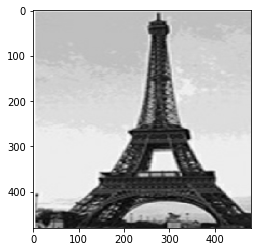

In [261]:
plt.imshow(img, cmap='gray')

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.]
(480, 180)


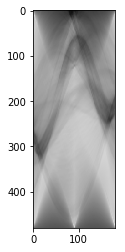

In [262]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)
[122400. 122400. 122400. 122400. 120422. 104804.  95262.  96199.  96822.
  97489.  97631.  97753.  97711.  97849.  98053.  98228.  98489.  98448.
  98403.  98100.  97902.  97902.  97702.  97394.  97143.  96965.  96965.
  96974.  96964.  96955.  96981.  97031.  97113.  97220.  97345.  97504.
  97743.  98011.  98264.  98551.  98735.  98836.  98740.  98620.  98497.
  98545.  98662.  98851.  99023.  99194.  99255.  99255.  99286.  99337.
  99301.  99313.  99358.  99371.  99380.  99326.  99312.  99234.  99124.
  98892.  98583.  98216.  97820.  97447.  97182.  96982.  96890.  96871.
  96946.  96943.  96963.  96946.  96924.  96954.  96982.  97031.  97040.
  97039.  96979.  96906.  96764.  96582.  96348.  96108.  95886.  95687.
  95506.  95319.  95116.  94900.  94732.  94593.  94636.  94705.  94873.
  94966.  94979.  94832.  94660.  94456.  94301.  94194.  94185.  94245.
  94220.  94233.  94233.  94181.  94015.  93808.  93547.  93256.  92973.
  92738.  92563.  92445.  92424.  92531.  92

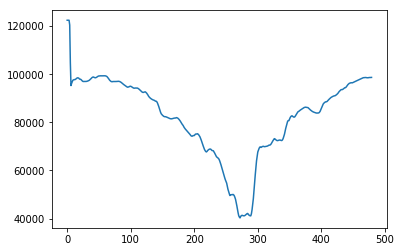

272


In [268]:
b = sinogram1[:,0]
print(b.shape)
print(b)
print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [269]:
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [101,151,201]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):
        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])
            vec[j] = 1
            vec[conv_sz[i] - 1 -j] = -1
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    min_angles.append(min(ans)/len(conv_sz))
        
    print('angle: ',k,'Val: ',min(ans)/len(conv_sz),'At arg: ',np.argmin(ans))
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  330774.3333333333 At arg:  272
angle:  1 Val:  378679.32686173235 At arg:  273
angle:  2 Val:  431366.04239304806 At arg:  274
angle:  3 Val:  478214.58693009964 At arg:  284
angle:  4 Val:  555808.614425029 At arg:  285
angle:  5 Val:  584633.1689913095 At arg:  290
angle:  6 Val:  573906.4603276689 At arg:  292
angle:  7 Val:  645026.9750837295 At arg:  294
angle:  8 Val:  698452.6823127253 At arg:  100
angle:  9 Val:  672843.5976613049 At arg:  100
angle:  10 Val:  642326.5770327538 At arg:  100
angle:  11 Val:  617727.6765678051 At arg:  108
angle:  12 Val:  587767.616622731 At arg:  166
angle:  13 Val:  540116.170093394 At arg:  165
angle:  14 Val:  495505.13832201646 At arg:  162
angle:  15 Val:  448999.70820411266 At arg:  126
angle:  16 Val:  385234.0973182434 At arg:  125
angle:  17 Val:  322287.3960885405 At arg:  125
angle:  18 Val:  263218.4579523677 At arg:  124
angle:  19 Val:  240574.11844416196 At arg:  123
angle:  20 Val:  226816.6788650316 At arg:  126

angle:  174 Val:  313059.5584824766 At arg:  222
angle:  175 Val:  305865.6590989556 At arg:  219
angle:  176 Val:  244560.22856982835 At arg:  216
angle:  177 Val:  190737.20145039473 At arg:  214
angle:  178 Val:  177543.47318885717 At arg:  212
angle:  179 Val:  237182.3197048666 At arg:  210


In [270]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

128


In [249]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3109.7375      3015.0954607   4010.85762173  5209.89984142
  6354.99287346  7477.48275952  8545.36245849  9563.61205956
 10446.78056561 11197.63886501 11844.05245571 12288.1748177
 12549.60616101 12623.08206948 12541.60180851 12319.90443439
 12070.49977177 11794.59342487 11494.62723082 11224.10079881
 11024.51386832 10958.4604918  10952.42647759 10897.14849664
 10736.61763462 10473.32383645 10055.76857619  9600.53248496
  9161.68016524  8905.13025171  8717.16748254  8601.57370917
  8490.26146425  8264.16760094  8020.91208985  7802.62639572
  7618.31754983  7404.73244034  7128.27474627  6904.72049412
  6711.10847278  6496.69647937  6358.013449    6214.39714711
  6024.39035904  5800.28712223  5570.08204198  5524.74712784
  5346.39361627  5051.93070686  4767.31661941  4517.45457746
  4309.37252694  4053.03591965  3871.45935714  3834.31116726
  3761.96302709  3808.42944496  3760.63860638  3659.13517787
  3732.21599707  3734.65248404  3746.33832959  3695.61489825
  3554.68134118  3382.661

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


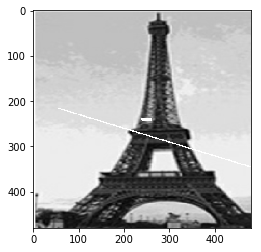

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




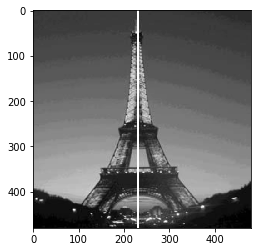

In [195]:
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
